# Instructor Do: Intro to the ROC Curve and AUC

In this activity, students will learn how to measure the performance of a binary classification model by fetching metrics from Keras, as well as plotting and interpreting the ROC curve and AUC.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from pathlib import Path

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\TinkerBell\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## The Dataset

The data provided for this demo contains anonymous information about `284807` credit card transactions made by European credit cardholders in September 2013.

The dataset is going to be used to create a binary classification model using a deep neural network to detect fraudulent transactions. It contains nine numerical variables, which are the result of PCA transformation to protect the confidentiality of credit cardholders. Only the transaction amount can be seen as is.

This dataset is an abstract of the file shared by the [Machine Learning Group](http://mlg.ulb.ac.be) of the Université Libre de Bruxelles (ULB).

In [4]:
# Import the dataset
data = pd.read_csv('../resources/transactions.csv')
data.count

<bound method DataFrame.count of                V1         V2        V3        V4        V5        V6  \
0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
...           ...        ...       ...       ...       ...       ...   
284802 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
284803  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
284804   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9  Amount  Class  
0       0.239599  0.098698  0.363787  149.62    

## Data Preprocessing

In [13]:
# Creating the X and y sets
X= data.iloc[:, 0:10].values
y=data.iloc[:, 10:].values

In [15]:
y[:10]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=int64)

In [16]:
# Import the StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X)
X_scaled=scaler.transform(X)
X_scaled[:5]

array([[-0.69424232, -0.04407492,  1.6727735 ,  0.97336551, -0.24511658,
         0.34706795,  0.19367894,  0.08263728,  0.33112778,  0.24496426],
       [ 0.60849633,  0.16117592,  0.1097971 ,  0.31652293,  0.04348335,
        -0.06181997, -0.06370021,  0.07125348, -0.23249419, -0.34247454],
       [-0.69350046, -0.81157783,  1.16946849,  0.26823129, -0.36457179,
         1.35145359,  0.63977564,  0.20737273, -1.37867535,  1.16068593],
       [-0.4933249 , -0.11216942,  1.18251645, -0.60972664, -0.00746888,
         0.93614983,  0.19207064,  0.3160176 , -1.26250317,  0.14053425],
       [-0.59132976,  0.53154105,  1.02141168,  0.2846554 , -0.29501544,
         0.07199858,  0.47930228, -0.22651023,  0.74432629, -0.07340334]])

Now that the data is scaled, the training, validation, and testing sets will be created.

In [45]:
# Creating training, validation, and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=78)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=78)

## Build and Train the Deep Learning Model

 ### Importing the Keras Modules

In [19]:
# Import Keras modules for model creation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

 ### Setting Up the Model

In [20]:
# Model set-up
number_input_features = 10
hidden_nodes_layer1 = 15
hidden_nodes_layer2 = 5

 ### Defining the Model's Structure

In [22]:
# Define the LSTM RNN model
model=Sequential()

# Layer 1
model.add(Dense(units=hidden_nodes_layer1, activation="relu", input_dim=number_input_features))

# Layer 2
model.add(Dense(units=hidden_nodes_layer2, activation="relu"))
# Output layer
model.add(Dense(units=1, activation='sigmoid'))


 ### Compiling the Model

In [42]:
# Compile the model
model.compile(loss='binary_crossentropy',  optimizer="adam",
             metrics=[
        "accuracy",
        tf.keras.metrics.TruePositives(name="tp"),
        tf.keras.metrics.TrueNegatives(name="tn"),
        tf.keras.metrics.FalsePositives(name="fp"),
        tf.keras.metrics.FalseNegatives(name="fn"),
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall"),
        tf.keras.metrics.AUC(name="auc")]
                 )

In [24]:
# Summarize the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 15)                165       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 80        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________


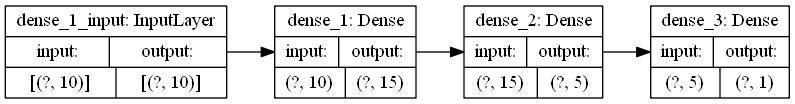

In [25]:
tf.keras.utils.plot_model(
    model, to_file='fraud.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=True, dpi=96
)

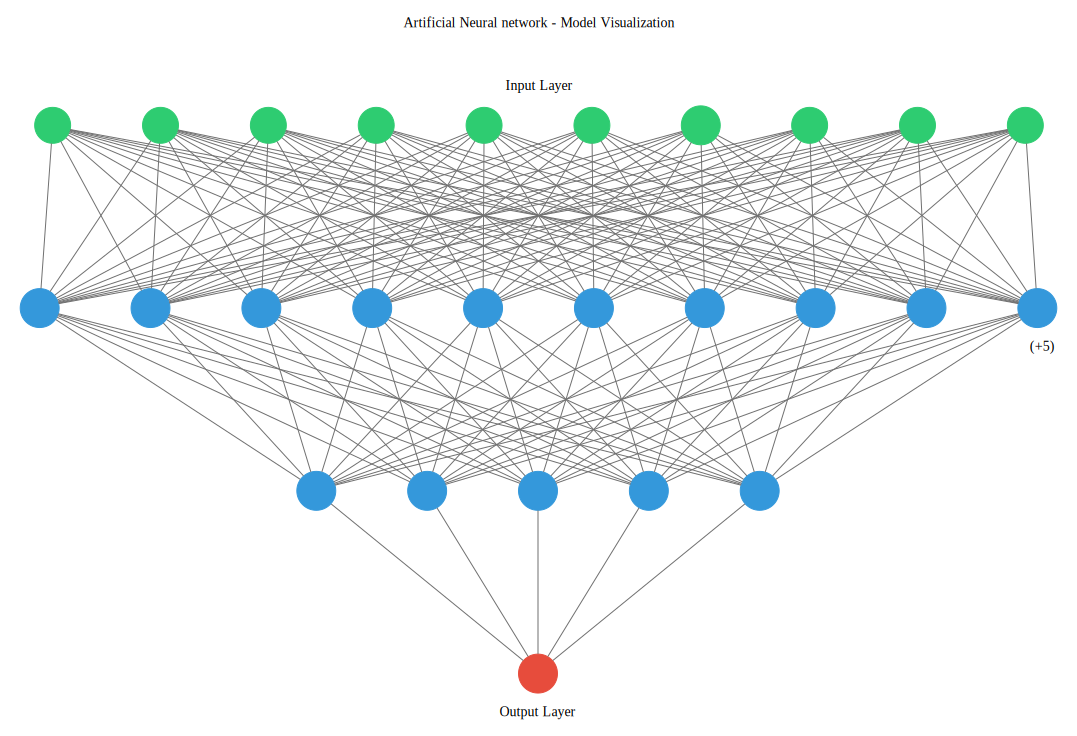

In [28]:
#from ann_visualizer.visualize import ann_viz
from ann_visualizer.visualize import ann_viz
ann_viz(model, view=True, filename='fraud.gv', title="Artificial Neural network - Model Visualization")
from graphviz import Source
Source.from_file('fraud.gv', format='png', engine='dot', encoding='utf-8')

 ### Training the Model

In [46]:
# Training the model
batch_size = 1000
epochs = 50
training_history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=1000, verbose=1)

Epoch 1/50
161/161 [==============================] - 2s 11ms/step - loss: 0.0027 - accuracy: 0.9994 - tp: 189.0000 - tn: 159918.0000 - fp: 28.0000 - fn: 68.0000 - precision: 0.8710 - recall: 0.7354 - auc: 0.9564 - val_loss: 0.0030 - val_accuracy: 0.9993 - val_tp: 83.0000 - val_tn: 53279.0000 - val_fp: 18.0000 - val_fn: 22.0000 - val_precision: 0.8218 - val_recall: 0.7905 - val_auc: 0.9565
Epoch 2/50
161/161 [==============================] - 2s 12ms/step - loss: 0.0027 - accuracy: 0.9994 - tp: 189.0000 - tn: 159918.0000 - fp: 28.0000 - fn: 68.0000 - precision: 0.8710 - recall: 0.7354 - auc: 0.9603 - val_loss: 0.0031 - val_accuracy: 0.9993 - val_tp: 83.0000 - val_tn: 53279.0000 - val_fp: 18.0000 - val_fn: 22.0000 - val_precision: 0.8218 - val_recall: 0.7905 - val_auc: 0.9565
Epoch 3/50
161/161 [==============================] - 2s 11ms/step - loss: 0.0027 - accuracy: 0.9994 - tp: 190.0000 - tn: 159918.0000 - fp: 28.0000 - fn: 67.0000 - precision: 0.8716 - recall: 0.7393 - auc: 0.9564 -

### Model Performance

#### Checking Training History

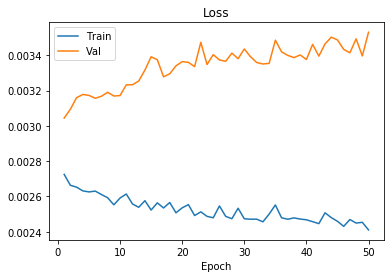

In [47]:
# Plotting loss
loss_df = pd.DataFrame(
    {
        "Epoch": range(1, epochs + 1),
        "Train": training_history.history["loss"],
        "Val": training_history.history["val_loss"],
    }
)
loss_df.set_index("Epoch", inplace=True)
loss_df.plot(title="Loss")

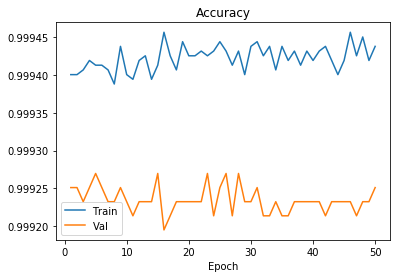

In [48]:
# Plotting accuracy
accuracy_df = pd.DataFrame(
    {
        "Epoch": range(1, epochs + 1),
        "Train": training_history.history["accuracy"],
        "Val": training_history.history["val_accuracy"],
    }
)
accuracy_df.set_index("Epoch", inplace=True)
accuracy_df.plot(title="Accuracy")

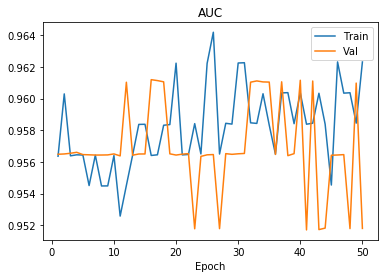

In [49]:
# Plotting AUC
auc_df = pd.DataFrame(
    {
        "Epoch": range(1, epochs + 1),
        "Train": training_history.history["auc"],
        "Val": training_history.history["val_auc"],
    }
)
auc_df.set_index("Epoch", inplace=True)
auc_df.plot(title="AUC")

#### Plotting the ROC Curve

In [51]:
# Import the roc_curve and auc metrics from sklearn
from sklearn.metrics import roc_curve, auc

In [52]:
# Making predictions to feed the roc_curve module
train_predictions = model.predict(X_train, batch_size=1000)
test_predictions = model.predict(X_test, batch_size=1000)

In [53]:
# Calculate the ROC curve and AUC for the training set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, train_predictions)
auc_train = auc(fpr_train, tpr_train)
auc_train = round(auc_train, 4)

# Calculate the ROC curve and AUC for the testing set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, test_predictions)
auc_test = auc(fpr_test, tpr_test)
auc_test = round(auc_test, 4)


In [54]:
# Create a DataFrame with the fpr and tpr results
roc_df_train = pd.DataFrame({"FPR Train": fpr_train, "TPR Train": tpr_train,})

roc_df_test = pd.DataFrame({"FPR Test": fpr_test, "TPR Test": tpr_test,})

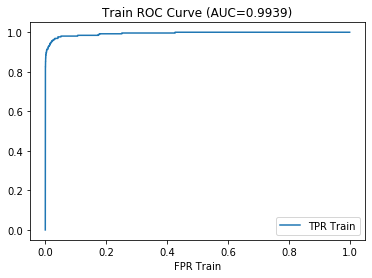

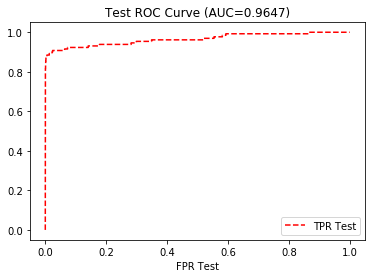

In [55]:
# Plotting the ROC Curves
roc_df_train.plot(
    x="FPR Train",
    y="TPR Train",
    xlim=([-0.05, 1.05]),
    title=f"Train ROC Curve (AUC={auc_train})",
)

roc_df_test.plot(
    x="FPR Test",
    y="TPR Test",
    color="red",
    style="--",
    xlim=([-0.05, 1.05]),
    title=f"Test ROC Curve (AUC={auc_test})",
)

#### Evaluate the Model

In [56]:
# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)

# Define metrics dictionary
metrics = {k: v for k, v in zip(model.metrics_names, scores)}

# Display evaluation metrics results
display(metrics)

{'loss': 0.003563703503459692,
 'accuracy': 0.9993539452552795,
 'tp': 102.0,
 'tn': 71054.0,
 'fp': 18.0,
 'fn': 28.0,
 'precision': 0.8500000238418579,
 'recall': 0.7846153974533081,
 'auc': 0.9416880011558533}

#### Confusion Matrix

In [57]:
# Define the confusion matrix data
cm_df = pd.DataFrame(
    {
        "Positive (1)": [f"TP={metrics['tp']}", f"FP={metrics['fn']}"],
        "Negative (0)": [f"FN={metrics['fp']}", f"TN={metrics['tn']}"],
    },
    index=["Positive(1)", "Negative(0)"],
)
cm_df.index.name = "Actual"
cm_df.columns.name = "Predicted"

# Show the confusion matrix
cm_df

Predicted,Positive (1),Negative (0)
Actual,,
Positive(1),TP=102.0,FN=18.0
Negative(0),FP=28.0,TN=71054.0


#### Classification Report

In [58]:
# Import the classification_report method from sklearn
from sklearn.metrics import classification_report

# Predict classes using testing data
y_predict_classes = model.predict_classes(X_test, batch_size=1000)

# Display classification report
print(classification_report(y_predict_classes, y_test))


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.78      0.85      0.82       120

    accuracy                           1.00     71202
   macro avg       0.89      0.92      0.91     71202
weighted avg       1.00      1.00      1.00     71202

